In [18]:
import json
import sample_data as MOV
import star_trek_tos_data as TOS
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime
import scipy.stats

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [19]:
MOV.sample_movies

{123: {'adult': False,
  'backdrop_path': '/8HqSxB9VLJkbRXRdlocbLq9wxwY.jpg',
  'belongs_to_collection': {'backdrop_path': '/uUG532EWfyhtKDzsA0sLb1PsHhL.jpg',
   'id': 141290,
   'name': 'The Lord of the Rings Animated Collection',
   'poster_path': '/pQuazFOlGRdn2Lb3oWFJYPeASOc.jpg'},
  'budget': 4000000,
  'credits': {'cast': [{'cast_id': 1,
     'character': 'Frodo (voice)',
     'credit_id': '52fe421bc3a36847f80047df',
     'gender': 2,
     'id': 16270,
     'name': 'Christopher Guard',
     'order': 0,
     'profile_path': '/7jHduhvSkeCVyPH3LQEeMC3hbvV.jpg'},
    {'cast_id': 2,
     'character': 'Gandalf (voice)',
     'credit_id': '52fe421bc3a36847f80047e3',
     'gender': 2,
     'id': 16271,
     'name': 'William Squire',
     'order': 1,
     'profile_path': None},
    {'cast_id': 3,
     'character': 'Sam (voice)',
     'credit_id': '52fe421bc3a36847f80047e7',
     'gender': 0,
     'id': 16272,
     'name': 'Michael Scholes',
     'order': 2,
     'profile_path': None},
   

In [20]:
description = []
title = []

for movie_id in MOV.sample_movies:
    movie_dat = MOV.sample_movies[movie_id]
    
    # print(json.dumps(movie_dat['adult'], indent = 4, sort_keys = True))
    
    x = movie_dat['adult']
    
    # print(x)
    
    try:
        description.append(movie_dat['overview'])
        title.append(movie_dat['original_title'])
        # guest_name.append(movie_dat['guest_names'])
    
    except KeyError:
        print('Error')

In [21]:
len(title)

500

In [22]:
df = pd.DataFrame({'Movie Title': title,
                  'Description': description,
                  })
df.head()

,Description,Movie Title
0,The film Republic of Korea 1% takes an up-clos...,대한민국 1%
1,The gravel voiced Italian singing sensation an...,Zucchero - Zu and co. - Live at the Royal Albe...
2,When the secret codes controlling a killer nuc...,Hidden Agenda
3,This impressive record of Sade's 1994 live pef...,Sade Live
4,Grady and Bobby Lee run moonshine for Uncle Je...,Moonrunners


In [23]:
sentiments = {}

compound = []
positive = []
negative = []
neutral = []
    
for text in df['Description']:
    
    results = analyzer.polarity_scores(text)
    com = results["compound"]
    pos = results["pos"]
    neg = results["neg"]
    neu = results["neu"]
            
    compound.append(com)
    positive.append(pos)
    negative.append(neg)
    neutral.append(neu)
    
sentiments=(compound, positive, negative, neutral)

In [24]:
the_data = {'Compound': sentiments[0],
           'Positive': sentiments[1],
           'Negative': sentiments[2],
           'Neutral': sentiments[3],
            'Movie Title': title,
               }

In [25]:
senti_data = pd.DataFrame(the_data)

In [26]:
senti_data.head()

,Compound,Movie Title,Negative,Neutral,Positive
0,-0.6486,대한민국 1%,0.135,0.777,0.088
1,-0.1280,Zucchero - Zu and co. - Live at the Royal Albe...,0.045,0.955,0.000
2,-0.7630,Hidden Agenda,0.204,0.665,0.131
3,0.9497,Sade Live,0.000,0.823,0.177
4,0.0000,Moonrunners,0.000,1.000,0.000


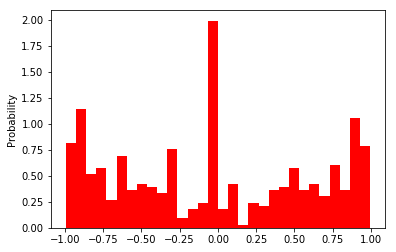

In [36]:
plt.hist(senti_data['Compound'], normed=True, bins=30, color = 'r')
plt.ylabel('Probability')
plt.show()